## Telco Churn prediction

![](img/happy-customer.jpg)


## Objective

Build a telco churn prediction model and understand what are the important factor contribute to customer churn. The model will help business stakeholders make plan for churn-prevention.


- Model task: binary classification ( churn, not churn)
- selected evaluation metric: AUC score (area-under-the-curve)
- Selected model: Logistic regression, Xgboost, LightGBM & other
- identify important feature contribute to churn and suggest action to business stakeholders


In [150]:
import numpy as np 
import pandas as pd 
from datetime import timedelta
import datetime as dt

import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics
from math import sqrt
import statsmodels.api as sm
from sklearn.feature_selection import chi2

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
import joblib
import gmplot 


from chart_studio import plotly
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]



## input data and exploratory analysis

In [15]:
df = pd.read_excel('data/TelcoDataSet.xlsx')

In [505]:
df.head()

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308,NaN,NaN,2.015,NaN,4.159,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.482,3.033,NaN,2.725,3.575,4.913,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.899,2.890,NaN,3.409,NaN,4.754,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246,NaN,NaN,NaN,NaN,3.497,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.841,NaN,NaN,NaN,NaN,3.401,3,0


In [506]:
df.shape

(1000, 42)

In [507]:
## describe summary stats
df.describe()

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,475.000000,386.000000,678.000000,296.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.502000,0.371000,2.182333,3.239709,3.568122,2.854212,3.598324,3.957206,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500246,0.483314,0.733932,0.413809,0.277570,0.557297,0.367295,0.803733,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.049000,1.749000,2.734000,1.012000,2.701000,2.197000,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.649000,2.970000,3.367500,2.464000,3.333500,3.367000,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,1.000000,0.000000,2.143000,3.209000,3.572500,2.848000,3.595000,3.850000,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,2.668000,3.489000,3.757750,3.209000,3.862000,4.419000,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,4.605000,5.153000,4.353000,4.694000,4.718000,7.419000,4.000000,1.000000


In [508]:
## data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
region       1000 non-null int64
tenure       1000 non-null int64
age          1000 non-null int64
marital      1000 non-null int64
address      1000 non-null int64
income       1000 non-null int64
education    1000 non-null int64
employ       1000 non-null int64
retire       1000 non-null int64
gender       1000 non-null int64
reside       1000 non-null int64
tollfree     1000 non-null int64
equip        1000 non-null int64
callcard     1000 non-null int64
wireless     1000 non-null int64
longmon      1000 non-null float64
tollmon      1000 non-null float64
equipmon     1000 non-null float64
cardmon      1000 non-null float64
wiremon      1000 non-null float64
longten      1000 non-null float64
tollten      1000 non-null float64
equipten     1000 non-null float64
cardten      1000 non-null float64
wireten      1000 non-null float64
multline     1000 non-null int64
voice        100

In [16]:
## check whether class imbalance

df.churn.value_counts()


0    726
1    274
Name: churn, dtype: int64

- the postive and negative class ratio still okay, no issue on imbalance dataset, therefore no further sampling like SMOTE needed. 
- for model evaluation metric we can use the accuracy ROC ( or F1-score will be relevant for imbalance class case)

### deal with null value 

In [17]:
## check null value

df.isnull().sum()

region         0
tenure         0
age            0
marital        0
address        0
income         0
education      0
employ         0
retire         0
gender         0
reside         0
tollfree       0
equip          0
callcard       0
wireless       0
longmon        0
tollmon        0
equipmon       0
cardmon        0
wiremon        0
longten        0
tollten        0
equipten       0
cardten        0
wireten        0
multline       0
voice          0
pager          0
internet       0
callid         0
callwait       0
forward        0
confer         0
ebill          0
loglong        0
logtoll      525
logequi      614
logcard      322
logwire      704
lninc          0
custcat        0
churn          0
dtype: int64

-  as we can see there are 4 variables with many null values, which are logtoll, logequip, logcard, logwire
- we can further explore the distribution of these variables and determine the treatment of null value, such as replace with zeroes or meanvalue & other

- meanwhile, the loglong contain no null value, and we can try make inference based on this variable, it is a log-scale of long distance call duration, logtoll --> can be log of toll free call duration, logwire --> can be log of cetain wireless usage duration

- we can try replace it with zero values first, as some of the user might not use these service at all

In [94]:
## deal with null value
df = df.fillna(0)

In [512]:
## seaborn pairplot

# sns.pairplot(df[:100])

In [18]:
## correlation matrix

corr = df.corr()

print(corr)



             region    tenure       age   marital   address    income  \
region     1.000000  0.016388  0.015034 -0.080637  0.010320  0.023765   
tenure     0.016388  1.000000  0.490217  0.154171  0.522952  0.242912   
age        0.015034  0.490217  1.000000 -0.014433  0.660435  0.327948   
marital   -0.080637  0.154171 -0.014433  1.000000 -0.012051 -0.043984   
address    0.010320  0.522952  0.660435 -0.012051  1.000000  0.226781   
income     0.023765  0.242912  0.327948 -0.043984  0.226781  1.000000   
education -0.057952 -0.109797 -0.154857  0.001400 -0.128330  0.113939   
employ     0.016335  0.520288  0.670047 -0.002891  0.463291  0.516349   
retire     0.005595  0.171143  0.429440 -0.078109  0.292503 -0.083651   
gender     0.050596  0.023533 -0.011419  0.008345  0.008363  0.038706   
reside    -0.065158 -0.036592 -0.254993  0.625999 -0.201645 -0.097591   
tollfree   0.025953  0.068731  0.092821  0.013499  0.065917  0.138450   
equip     -0.016346 -0.153177 -0.172481 -0.000288 -

In [23]:
corr.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'education',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn'],
      dtype='object')

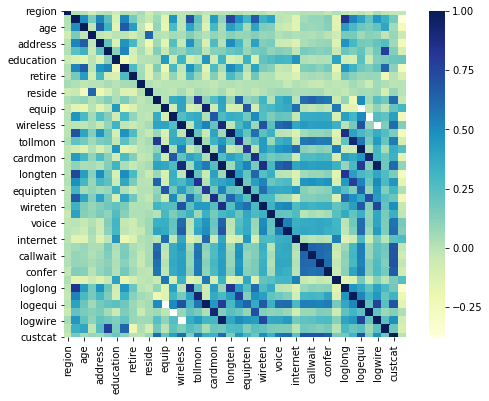

In [19]:
# corr heatmap 
sns.heatmap(corr,  cmap="YlGnBu" , square=True)


- there are some variables that are highly-correlated such as 
- there is no variable highly-correlated with churn

In [25]:
## plotly heatmap inteactive chart

fig = go.Figure(data=go.Heatmap(
                    z=corr,
                    x=corr.columns,
                    y= corr.columns, colorscale="Viridis"))
fig.show()

In [515]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'education',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn'],
      dtype='object')

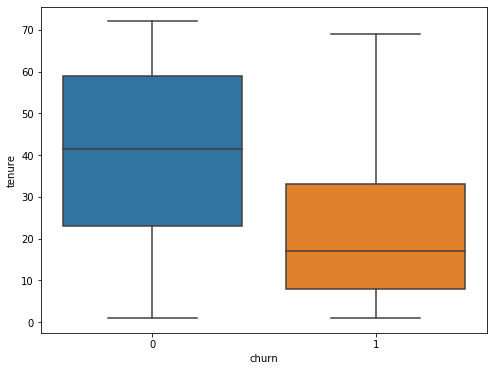

In [516]:
sns.boxplot(x="churn", y="tenure", data=df)

Text(0.5, 1.0, 'Distribution of tenure by churn')

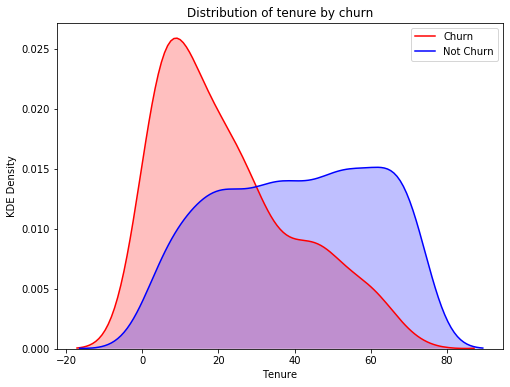

In [54]:
## KDE density plot to compare distribution

ax = sns.kdeplot(df.tenure[(df["churn"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.tenure[(df["churn"] == 0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Churn","Not Churn"],loc='upper right')
ax.set_ylabel('KDE Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')

- the tenure distribution is different for churn and non-churn group
- churn group center at around tenure = 8 to 10 , wheares not-churn group center at tenure= 40
- the longer the tenure, the less likely they will churn

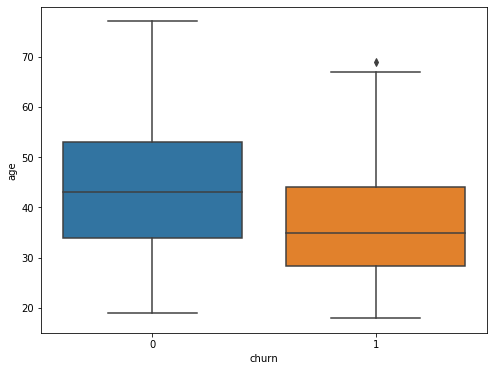

In [384]:
sns.boxplot(x="churn", y="age", data=df)

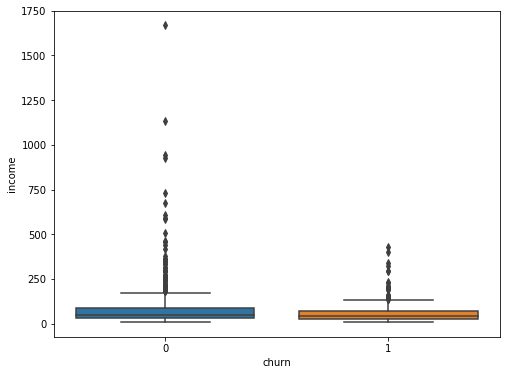

In [385]:
sns.boxplot(x="churn", y="income", data=df)

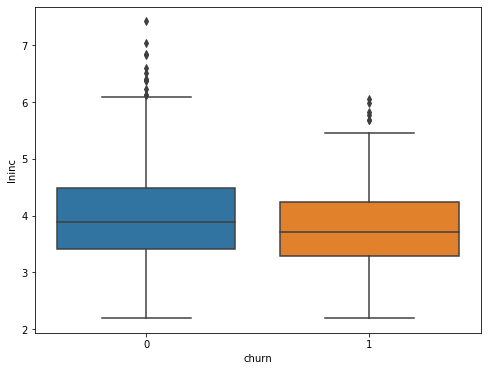

In [386]:
sns.boxplot(x="churn", y="lninc", data=df)

- both income and log-income distribution are not much difference for both churn and non-churn group

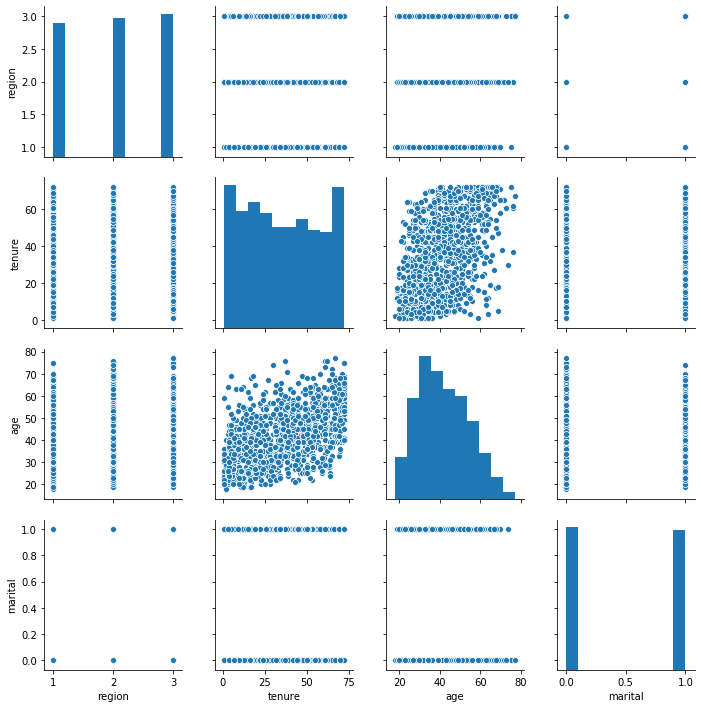

In [387]:
## pairplot
sns.pairplot(df.iloc[:,:4] )


## data preprocess and feature engineering

- some of the variable is in numeric but it represent a class instead of number (e.g. region, address)
- it is important to convert these variable to categorical variable, else it will affect the model accuracy and interpretation
- some variable is binary in its own ( e.g. marital: 0 or 1, yes or no) these variable we can remain as it is

- for feature selection, we can run chi-square test

### data transformation on categorical variables

In [26]:

## convert var to categorical 
cat_columns= [ 'region', 'address', 'education', 'employ', 'reside', 'custcat']

## change data-type to category for further processing
df[cat_columns] = df[cat_columns].astype('category')


In [27]:
## create dummy data for categorical var (to be fit into one-hot-encoding and model)
df_cat_dummy = pd.get_dummies( df[cat_columns], prefix_sep='_')

In [28]:
df_cat_dummy.head()

,region_1,region_2,region_3,address_0,address_1,address_2,address_3,address_4,address_5,address_6,...,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,custcat_1,custcat_2,custcat_3,custcat_4
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [29]:
## join the original data with cat_dummy_data

df = df.join(df_cat_dummy)

In [30]:
df.head()

,region,tenure,age,marital,address,income,education,employ,retire,gender,...,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,custcat_1,custcat_2,custcat_3,custcat_4
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,11,33,1,7,136,5,5,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,68,52,1,24,116,1,29,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2,23,30,1,9,30,1,2,0,0,...,0,1,0,0,0,0,0,0,1,0


In [31]:
## drop column not needed 
df = df.drop(cat_columns , axis='columns')

In [32]:
df.head()

,tenure,age,marital,income,retire,gender,tollfree,equip,callcard,wireless,...,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,custcat_1,custcat_2,custcat_3,custcat_4
0,13,44,1,64,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,11,33,1,136,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,68,52,1,116,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,33,33,0,33,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,23,30,1,30,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## train test split

In [127]:

X = df.drop(['churn'],axis=1)
y = df['churn']

# X = df[['tenure', 'age','equip']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 151) (200, 151)


## Model - Logistic regression

In [128]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
## make prediction
log_clf_predictions = log_clf.predict( X_test )
log_clf_predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [130]:
print(classification_report(y_test, log_clf_predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       149
           1       0.59      0.51      0.55        51

    accuracy                           0.79       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.78      0.79      0.78       200



In [154]:
## confusion matrix
conf_matrix = confusion_matrix(y_test,log_clf_predictions)
print(conf_matrix)

[[131  18]
 [ 25  26]]


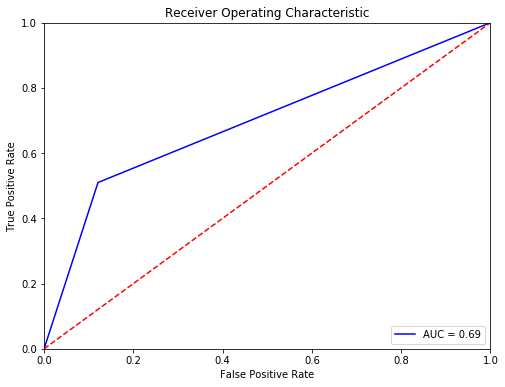

In [131]:
## false positive rate, true positive rate, for ROC
fpr, tpr, threshold = metrics.roc_curve(y_test, log_clf_predictions)
roc_auc = metrics.auc(fpr, tpr)

## ROC plot

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


- the AUC score = 0.72 still have room to improve

In [108]:
# save the model to disk
filename = 'model/telco_churn_log_clf.sav'
joblib.dump( log_clf , filename)
 

['model/telco_churn_log_clf.sav']

## Model - Xgboost - simple

In [132]:
## xgboost model
xgb_clf = XGBClassifier(n_estimators=100, max_depth=7,eval_metric ='auc',
                        learning_rate = 0.1, min_child_weight= 10, subsample= 0.8 )
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=10, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [133]:
## make prediction
xgb_clf_predictions = xgb_clf.predict( X_test )
xgb_clf_predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [134]:
print(classification_report(y_test, xgb_clf_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       149
           1       0.61      0.53      0.57        51

    accuracy                           0.80       200
   macro avg       0.73      0.71      0.72       200
weighted avg       0.79      0.80      0.79       200



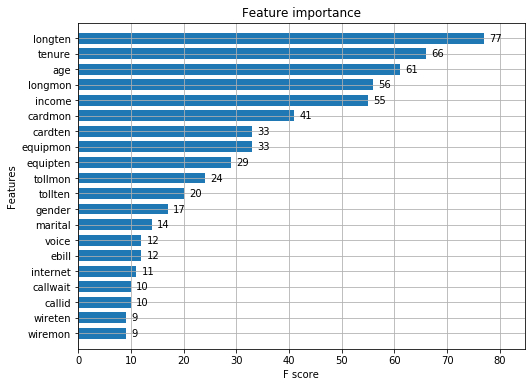

In [135]:
## xgb variable importance plot

xgb.plot_importance( xgb_clf, max_num_features=20, height=0.7)


as based on the model feature importance
- income,longten, age are the top3 contributing factor to churn


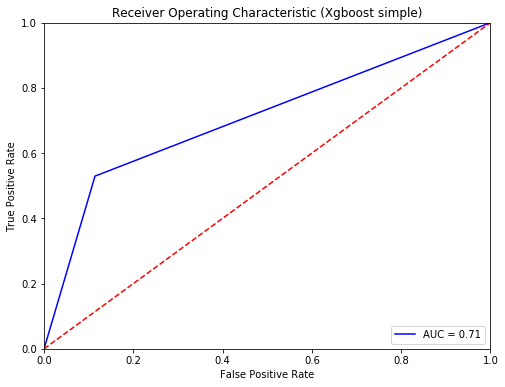

In [136]:
## false positive rate, true positive rate, for ROC
fpr, tpr, threshold = metrics.roc_curve(y_test, xgb_clf_predictions)
roc_auc = metrics.auc(fpr, tpr)

## ROC plot

plt.title('Receiver Operating Characteristic (Xgboost simple)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


- the AUC score = 0.71 still have room to improve

## Model - Xgboost with custom parameter, boosting & early-stopping

In [114]:
## create specific train matrix dataset for xgboost and with n samples

data_train  = xgb.DMatrix (X_train, label=y_train )
data_test  = xgb.DMatrix( X_test   , label=y_test )
eval_list = [(data_train, 'train'), (data_test, 'test')]

In [137]:
## model parameter
xgb_params = {'max_depth':7, # maximum depth of a tree
             'objective':'binary:logistic', ## objective function
             'booster' : "gbtree",
             'eval_metric': "auc",
             'eta'      :0.1, # learning rate 
             'lambda '  :4,   #L2 regularization term, suggest >1 more conservative 
             'colsample_bytree ':0.8,
             'colsample_bylevel':1,
             'min_child_weight': 10, 
             'subsample':0.8, # subsample percentage of data
             'nthread'  :4}  #number of cpu core

## build xgboost model
xgb_model = xgb.train(xgb_params, data_train, num_boost_round=300, evals = eval_list,
                  early_stopping_rounds=50, maximize=True)  ## set maximize = True if the eval-metric is higher the better

## print score
print('score = %1.4f, n_boost_round =%d.'  %(xgb_model.best_score ,  xgb_model.best_iteration) )

[12:01:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { colsample_bytree , lambda  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.79428	test-auc:0.78640
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.80990	test-auc:0.80315
[2]	train-auc:0.81534	test-auc:0.79782
[3]	train-auc:0.82058	test-auc:0.79553
[4]	train-auc:0.82455	test-auc:0.81228
[5]	train-auc:0.83554	test-auc:0.82040
[6]	train-auc:0.83920	test-auc:0.81152
[7]	train-auc:0.84388	test-auc:0.80391
[8]	train-auc:0.84704	test-auc:0.80517
[9]	train-auc:0.85037	test-auc:0.80416
[10]	train-auc:0.85225	test-auc:0.80619
[11]	train-auc:0.85437	te

In [138]:
## make prediction
xgb_predictions = xgb_model.predict( xgb.DMatrix(X_test) )
xgb_predictions[:10]

array([0.03218659, 0.0509673 , 0.67673784, 0.1099831 , 0.5336811 ,
       0.45596465, 0.5596377 , 0.33894742, 0.49302492, 0.2559159 ],
      dtype=float32)

In [139]:
## as xgboost method above return probabilitie value, we need set threshold and convert to binary class
# threshold = 0.5
# xgb_predictions = [1 if n >= threshold else 0 for n in xgb_predictions]
# xgb_predictions[:10]


In [140]:
# print(classification_report(y_test, xgb_predictions))

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

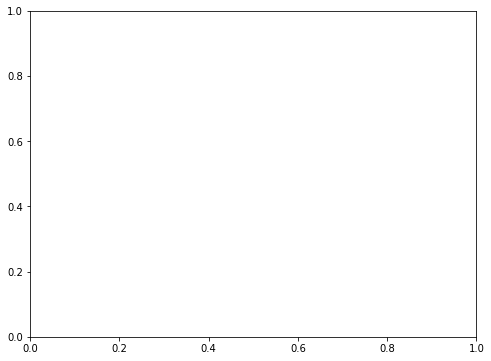

In [148]:
xgb.plot_tree(xgb_model)

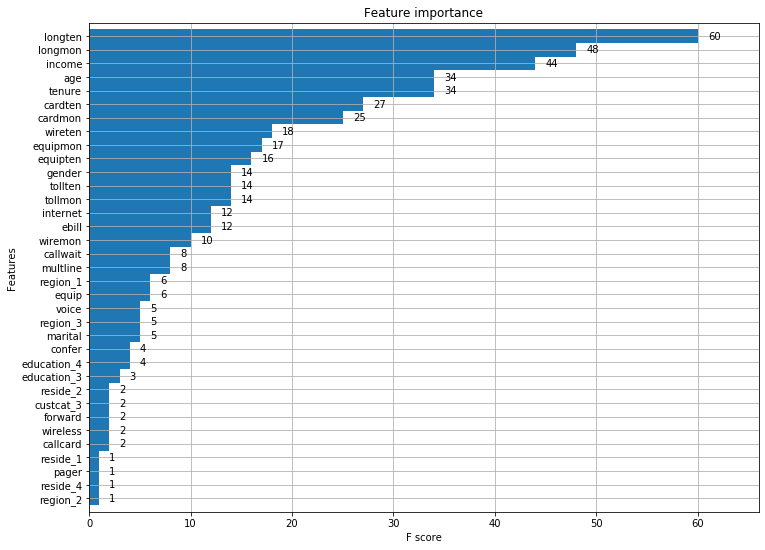

In [167]:
## xgb variable importance plot

xgb.plot_importance( xgb_model, max_num_features=50, height=1)


as based on the model feature importance
- longten, longmon, income, tenure and age are the top5 contributing factor to churn
- understand longten & longmon more detail (  definition is long distance over month, and over tenure) and how it can be include/exclude to enhance product offering and lower churn
- the longer the tenure, the less likely they will churn

- in the other hand, the top5 least importance feature: region and residential area, pager, callcard and wireless.


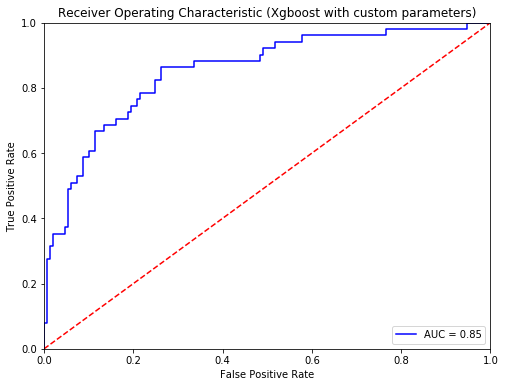

In [142]:
## false positive rate, true positive rate, for ROC
fpr, tpr, threshold = metrics.roc_curve(y_test, xgb_predictions)
roc_auc = metrics.auc(fpr, tpr)

## ROC plot

plt.title('Receiver Operating Characteristic (Xgboost with custom parameters)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


- Not bad for the first few try, we able to achieve AUC score = 0.85


In [143]:
# save the model to disk
filename = 'model/telco_churn_xgboost_custom.sav'
joblib.dump( xgb_model , filename)
 

['model/telco_churn_xgboost_custom.sav']

## Model - Light GBM model

In [155]:

## create model-specific train data matrix

data_train  = lgb.Dataset (X_train, label=y_train )
data_test  = lgb.Dataset( X_test  , label=y_test )
eval_list = [(data_train, 'train'), (data_test, 'test')]


## define parameter
params = {
    'objective':'binary', ## linear objective function
    'eval_metric': "auc",   
    'max_depth': 7, 
    'learning_rate': 0.1,
    'lambda '  :4,   #L2 regularization term, suggest >1 more conservative 
    'subsample':0.8, # subsample percentage of data
    'verbose': 10} 

## number of estimators
n_estimators = 500


## model 
lightgbm_model = lgb.train(params, data_train, n_estimators,  verbose_eval=1)

In [156]:

## model prediction
lgb_predictions = lightgbm_model.predict(X_test)
lgb_predictions[:10]


array([7.65658544e-05, 2.11487096e-06, 9.80835716e-01, 4.79696270e-06,
       9.89485579e-01, 1.52449029e-01, 9.44680792e-01, 4.97869138e-03,
       9.78980101e-01, 2.83206143e-01])

In [157]:
# ## as method above return probabilitie value, we need set threshold and convert to binary class
# threshold = 0.5
# lgb_predictions = [1 if n > threshold else 0 for n in lgb_predictions]

# lgb_predictions[:10]


In [158]:
# print(classification_report(y_test, lgb_predictions))

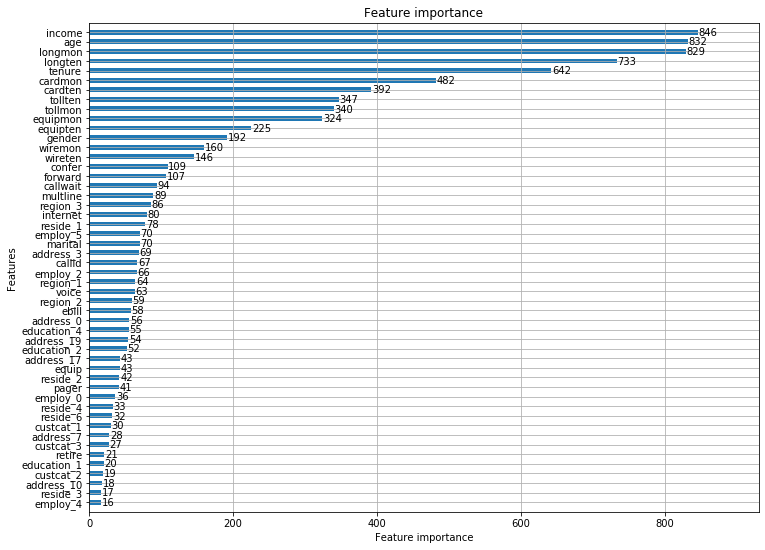

In [166]:
## set figure plot size
plt.rcParams['figure.figsize'] = [12, 9]


## lgb variable importance plot
lgb.plot_importance( lightgbm_model, max_num_features=50, height=0.5)



the LGB model feature importance look quite similar to XGboost model
- longten, longmon, income, tenure and age are the top5 contributing factor to churn

- in the other hand, the top5 least importance feature: address, residential area, customer category (who be useful if we able to get more detail on customer-category definition, how the segmentation and what custcat=2 refer to )


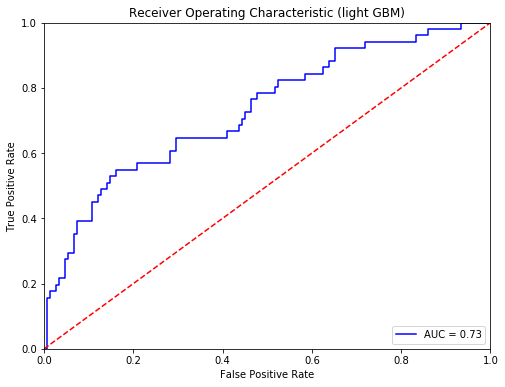

In [160]:
## false positive rate, true positive rate, for ROC
fpr, tpr, threshold = metrics.roc_curve(y_test, lgb_predictions)
roc_auc = metrics.auc(fpr, tpr)

## ROC plot

plt.title('Receiver Operating Characteristic (light GBM)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [452]:
# save the model to disk
filename = 'model/telco_churn_lightgbm.sav'
joblib.dump( lightgbm_model , filename)
 

['model/telco_churn_lightgbm.sav']

## Summary


#### (1) Model performance:
- We had tested different machine learning model to predict the telco churn user and compare based on AUC score as evaluation metric
    - Logistic regression , AUC = 0.69
    - xgboost model (simple), AUC = 0.71
    - Xgboost model (custom parameter) , AUC = 0.85
    - LightGBM model, AUC = 0.73
- Overall, Xgboost model with custom parameter give us the best model performance

/////////////////////////

#### (2) Feature importance: ( what are the factor contribute to customer churn?)

![](img/xgb_feature.png)


- based on the xgboost model feature importance plot, we observed that:
    - longten, longmon, income, tenure and age are the top5 contributing factor to churn
    - understand longten & longmon more detail (  definition is long distance over month, and over tenure) and how it can be include/exclude to enhance product offering and lower churn
    - the longer the tenure, the less likely they will churn
    - in the other hand, the top5 least importance feature: region and residential area, pager, callcard and wireless.

/////////////////////////
    
#### (3) Suggestion/ Future work/ next phase


##### action to lower churn

- retain existing loyal user (high tenure) by offer loyalty package offer based on the preference. It is more cost-effective to keep one than acquire new customer

- identified potential churn user within next 3/6/12 months, obtain feedback and offer personalized offer



#####  to improve the model performance

- add in more user behavior data such as demographic, credit-score, behavioral and customer segment

- Include time-series data such as (user start date and user complaint date) to better predict likelihood of churn in the defined timeframe ( next 3 months, next 6 months)

- add in user sentiment and satisfaction score

- perform NLP text processing for social media, call record to understand their feedback and interested topic or product or promotion 
